In [162]:
import cv2
import mediapipe as mp
import matplotlib.pyplot as plt
from mediapipe.python.solutions.drawing_utils import draw_landmarks
from mediapipe.python.solutions import drawing_styles

import os
import sys

import util.opencv_utils
sys.path.append(os.path.abspath(".."))
import importlib
import util.mediapipe_utils
import util.opencv_utils

importlib.reload(util.mediapipe_utils)
importlib.reload(util.opencv_utils)

from util.mediapipe_utils import *
from util.opencv_utils import *

%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


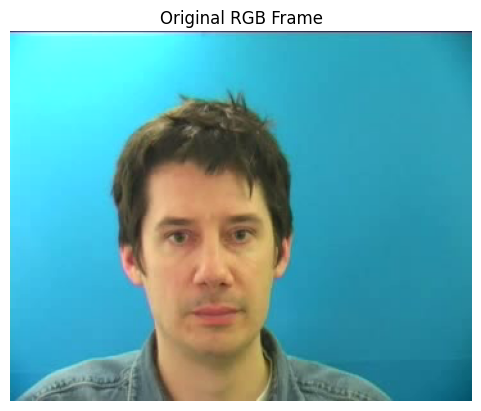

In [200]:
# Extract and display first frame
video_path = r"C:\Projects\Lip_Reading\GRID\s1\bbaf2n.mpg"

rgb_frame = load_video(video_path)[0]
image_shape = (len(rgb_frame),len(rgb_frame[0]))
# isolate first frame of video for testing + dimensions

plt.imshow(rgb_frame)
plt.title("Original RGB Frame")
plt.axis(False)
plt.show()

In [222]:
# Get mesh and landmarks for frame
landmarks = get_landmarks(rgb_frame)[0]

if landmarks:
    print("Landmarks detected!")
else:
    print("No face landmarks found.")


Landmarks detected!


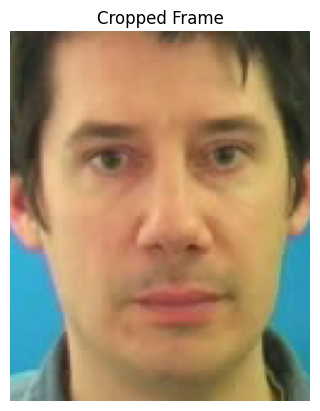

In [223]:
# Crop face only
coords = convert_landmarks_to_coordinates(landmarks, image_shape)

x_min, y_min, x_max, y_max = get_bounding_box(coords, image_shape)

cropped_frame = rgb_frame[int(y_min):int(y_max), int(x_min):int(x_max)]
plt.imshow(cropped_frame)
plt.title("Cropped Frame")
plt.axis(False)
plt.show()

In [224]:
# Get mesh and landmarks for frame
landmarks = get_landmarks(cropped_frame)[0]

if landmarks:
    print("Landmarks detected!")
else:
    print("No face landmarks found.")

Landmarks detected!


In [227]:

frame_copy = cropped_frame.copy()
if landmarks:
    for face_landmarks in landmarks:
        draw_landmarks(
            image=frame_copy,
            landmark_list=face_landmarks,
            connections=mp_face_mesh.FACEMESH_TESSELATION,
            landmark_drawing_spec=None,
            connection_drawing_spec=drawing_styles.get_default_face_mesh_tesselation_style()
        )

plt.figure(figsize=(10, 10))
plt.imshow(frame_copy)
plt.title("MediaPipe Face Mesh")
plt.axis("off")
plt.show()


TypeError: 'NormalizedLandmarkList' object is not iterable

In [ ]:
# Outer lips (full loop)
outer_lips = [61, 146, 91, 181, 84, 17, 314, 405, 321, 375, 291, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78]

# Inner lips (inside mouth opening)
inner_lips = [78, 191, 80, 81, 82, 13, 312, 311, 310, 415, 308, 324, 318, 402, 317, 14, 87, 178, 88, 95, 78]

# Combine and remove duplicates
mouth_indices = list(set(outer_lips + inner_lips))
mouth_indices.sort()


landmarks = results.multi_face_landmarks[0]
h, w, _ = rgb_frame.shape

mouth_coords = []
for i in mouth_indices:
    lm = landmarks.landmark[i]
    x, y = int(lm.x * w), int(lm.y * h)
    mouth_coords.append((x, y))



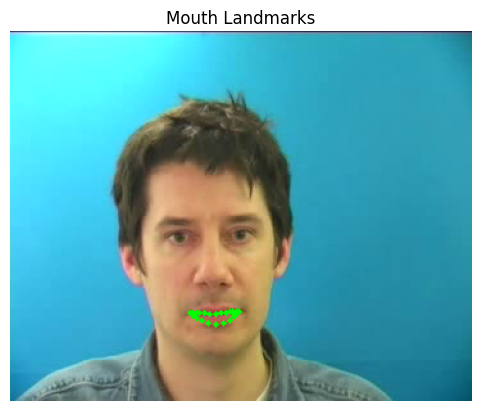

In [ ]:
mouth_frame = rgb_frame.copy()
for x, y in mouth_coords:
    cv2.circle(mouth_frame, (x, y), 2, (0, 255, 0), -1)

plt.imshow(mouth_frame)
plt.title("Mouth Landmarks")
plt.axis("off")
plt.show()
